In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

from sklearn import preprocessing
from sklearn import utils
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

walmart = pd.read_csv(r"C:\Users\DELL\Downloads\walmart-sales-dataset-of-45stores.csv")
walmart.keys()

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [3]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
walmart["Date"].value_counts()

05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: Date, Length: 143, dtype: int64

In [5]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
np.random.seed(42)

In [7]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(walmart, 0.2)
len(train_set)

5148

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(walmart, test_size=0.2, random_state=42)
test_set.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2436,18,12-03-2010,1138800.32,0,42.39,2.805,131.784000,9.202
3361,24,24-06-2011,1304850.67,0,68.88,3.964,135.265267,8.212
233,2,28-10-2011,1769296.25,0,65.87,3.372,217.325182,7.441
3667,26,11-11-2011,1077640.13,0,40.08,3.570,136.461806,7.598
5011,36,19-03-2010,428851.99,0,59.56,2.701,209.980321,8.554


<AxesSubplot:>

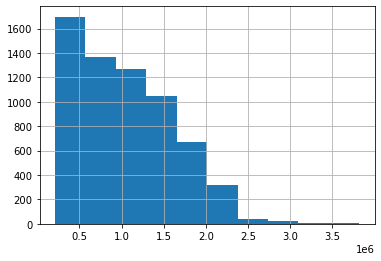

In [9]:
walmart["Weekly_Sales"].hist()